In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import seaborn as sns


In [ ]:
cocacola = pd.read_excel("CocaCola_Sales_Rawdata.xlsx",header=0, index_col=0, parse_dates=True)
cocacola.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


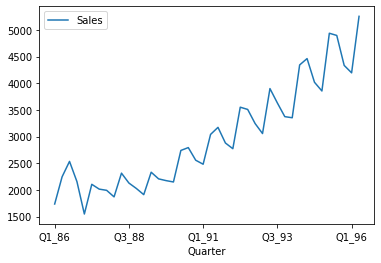

In [ ]:
cocacola.plot()
pyplot.show()

Histogram and Density Plots

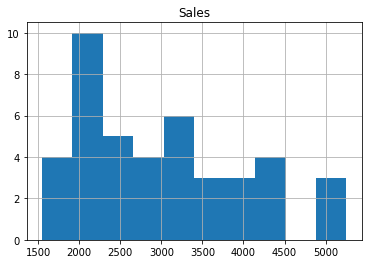

In [ ]:
cocacola.hist()
pyplot.show()

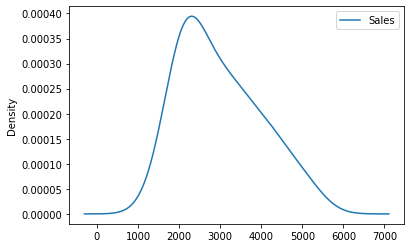

In [ ]:
cocacola.plot(kind='kde')
pyplot.show()

# split quarter and year data 

In [ ]:

cocacola[['quater','year']] = cocacola.Quarter.str.split("_",expand=True)

In [ ]:
cocacola.head()

,Quarter,Sales,quater,year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [ ]:
dummy=pd.get_dummies(cocacola['quater'])
cocacola1 = pd.concat([cocacola,dummy],axis = 1)


In [ ]:
cocacola1.head()

,Quarter,Sales,quater,year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


In [ ]:
cocacola1.shape

(42, 8)

In [ ]:
cocacola1['t']=np.arange(1,43)

In [ ]:
cocacola1['t2']=cocacola1['t']*cocacola1['t']
cocacola1["Log_sales"] = np.log(cocacola1["Sales"])

In [ ]:
cocacola1.head()

,Quarter,Sales,quater,year,Q1,Q2,Q3,Q4,t,t2,Log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


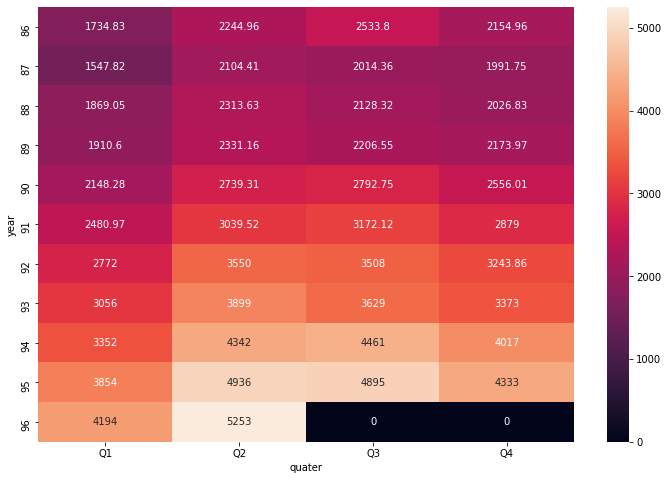

In [ ]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=cocacola1,values="Sales",index="year",columns="quater",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") 

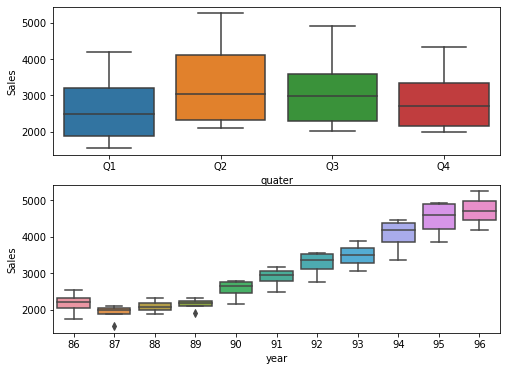

In [ ]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="quater",y="Sales",data=cocacola1)
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=cocacola1)

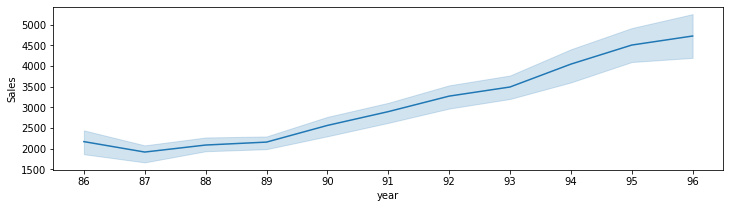

In [ ]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Sales",data=cocacola1)

# Model based methods

In [ ]:
Train = cocacola1.head(38)
Test = cocacola1.tail(4)

In [ ]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


591.553295722396

In [ ]:
#Exponential

Exp = smf.ols('Log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


466.2479731067161

In [ ]:
#Quadratic 

Quad = smf.ols('Sales~t+t2',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t2"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

475.5618351831482

In [ ]:
#Additive seasonality 

add_sea = smf.ols('Sales~Q1+Q2+Q3',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1860.0238154547278

In [ ]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t2+Q1+Q2+Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','t','t2']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

301.73800719351857

In [ ]:
##Multiplicative Seasonality

Mul_sea = smf.ols('Log_sales~Q1+Q2+Q3',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1963.3896400779727

In [ ]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('Log_sales~t+Q1+Q2+Q3',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

225.52439049816806

In [ ]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,225.524390
4,rmse_add_sea_quad,301.738007
1,rmse_Exp,466.247973
2,rmse_Quad,475.561835
0,rmse_linear,591.553296
3,rmse_add_sea,1860.023815
5,rmse_Mult_sea,1963.389640


# comparing all model rmse_Mult_add_sea	model is best 